# Quickstart: Daytrading with vectorbt & CoinEx
This notebook loads sample OHLCV data, builds EMA/BB signals, runs a backtest, and displays KPIs and equity chart.

In [8]:
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

In [9]:
# Load sample data (BTC/USDT, 1h)
df = pd.read_csv('../data/raw/BTC-USDT_1h.csv', parse_dates=['datetime']).set_index('datetime')
close = df['close'].astype(float)

In [4]:
# Build EMA signals
fast = vbt.MA.run(close, window=20).ma
slow = vbt.MA.run(close, window=60).ma
entries = fast.vbt.crossed_above(slow)
exits = fast.vbt.crossed_below(slow)

In [5]:
# Run backtest
pf = vbt.Portfolio.from_signals(close, entries, exits, fees=0.001, slippage=0.0002, init_cash=8000, freq='1h')

In [6]:
# Show KPIs
stats = pf.stats()
stats[['Total Return [%]', 'Max Drawdown [%]', 'Sharpe Ratio', 'Win Rate [%]', 'Profit Factor']]

Total Return [%]    -0.082538
Max Drawdown [%]    13.358265
Sharpe Ratio         0.084366
Win Rate [%]        22.222222
Profit Factor        1.007469
dtype: object

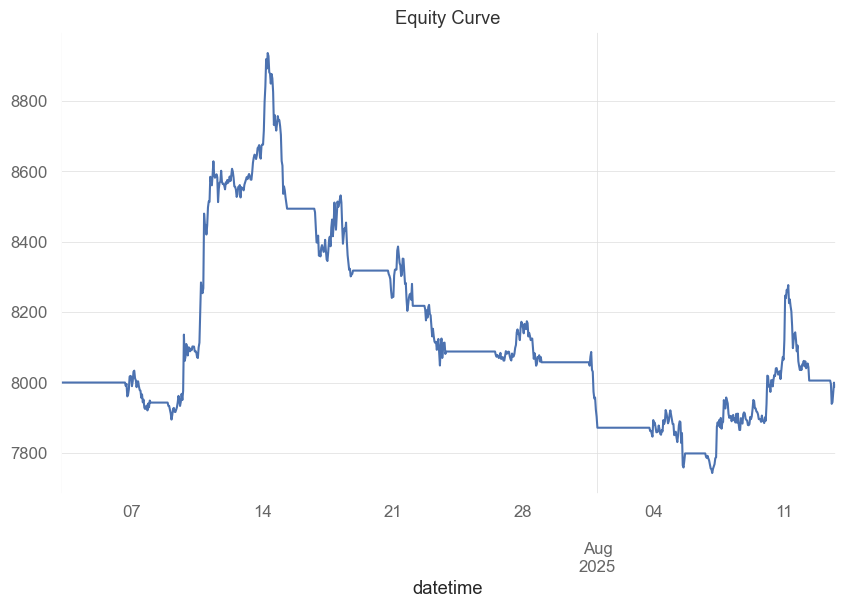

In [7]:
# Plot equity curve
pf.value().plot(title='Equity Curve')
plt.show()